# Exercise set 3

In [1]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import norm, splu, spsolve
import matplotlib.pyplot as plt
from matplotlib import cm 
import time

### Exercise 1a

In [36]:
### a
def fdm2d(n: int, a_x = -1.0, a_y = -1.0, b_x = 0.0, b_y = 0.0, c = 0.0) -> (sparse.csc_matrix, np.array): 
    h = 1.0/(n+1)
    Dx = sparse.diags([a_x - h*b_x/2, -2*a_x+h*h*c/2.0, a_x + h*b_x/2], offsets=[-1, 0, 1], shape=(n,n))
    Dy = sparse.diags([a_y - h*b_y/2, -2*a_y+h*h*c/2.0, a_y + h*b_y/2], offsets=[-1, 0, 1], shape=(n,n))
    Id = sparse.eye(n,n); 
    A = sparse.kron(Id, Dx) + sparse.kron(Dy, Id)
    [X, Y] = np.meshgrid(np.arange(1, n+1) * h, np.arange(1, n+1) * h) 
    b = h**2 * np.reshape(X - Y, (n**2, 1))
    return sparse.csc_matrix(A), b

A,b=fdm2d(5,-1.0,-1.0,3.0,-4.0,1.0); print(type(A)) # -> <class ’scipy.sparse.bsr.bsr_matrix’> 

# print(f"A: {A.toarray()}")
# print(f"b: {b}")

<class 'scipy.sparse.csc.csc_matrix'>


### Exercise 1b

In [3]:
### b
n_list = [32, 128]

for n in n_list:
    print(f"\nn={n}:")
    A, b = fdm2d(n,-1.0,-1.0,3.0,-4.0,1.0);
    u = spsolve(A,b); 
    print(u)
    

# # quick check if solution is correct
# np.linalg.norm(A*u-b,2)




n=32:
[-7.44376872e-05 -1.27534162e-04 -1.58497569e-04 ... -2.14345951e-04
 -1.25973818e-04 -5.32917912e-05]

n=128:
[-4.95163328e-06 -9.54832244e-06 -1.37834340e-05 ... -1.14810491e-05
 -7.30157876e-06 -3.46763039e-06]


/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


### Exercise 1c

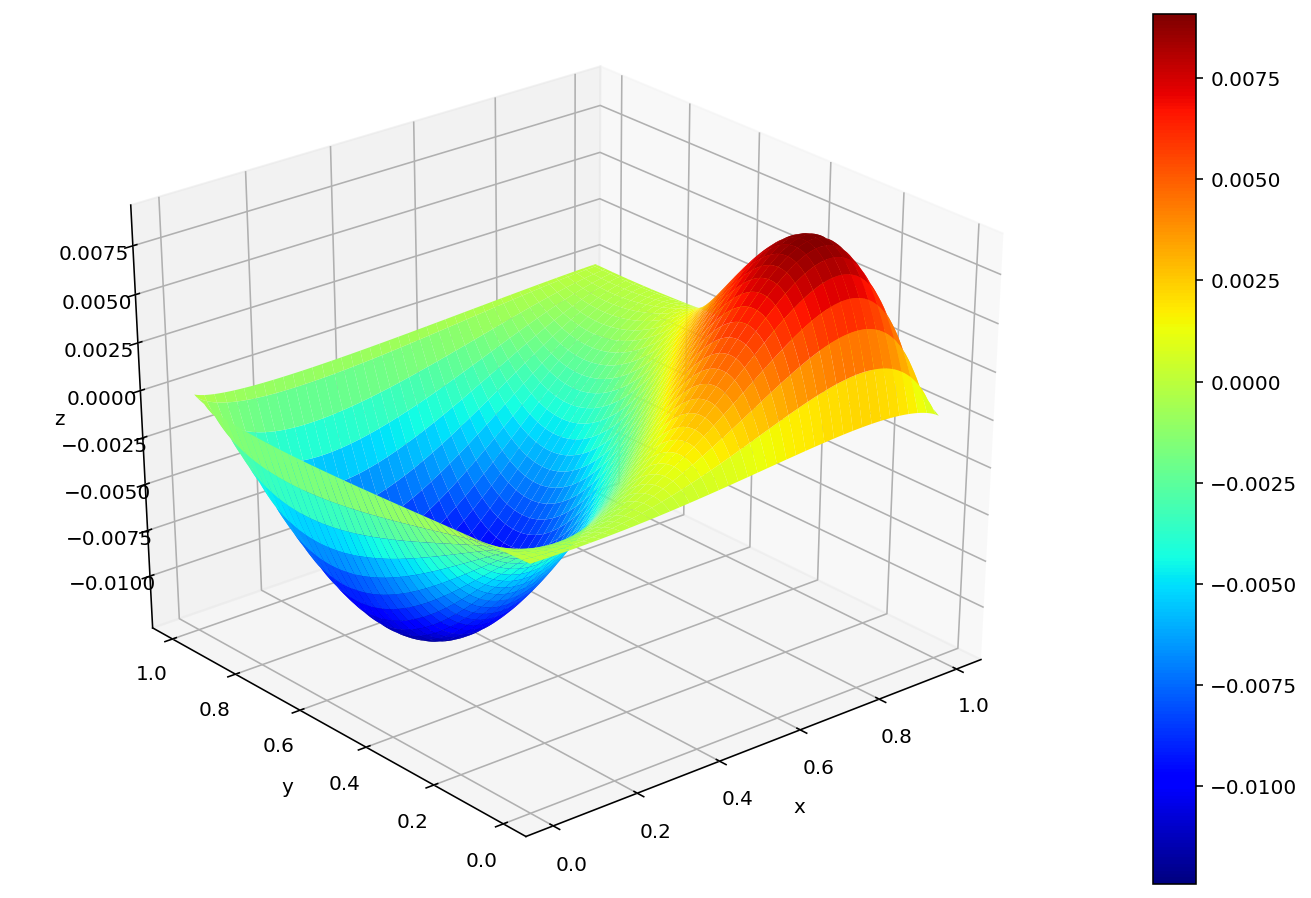

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

h = 1.0/(n+1)
[X, Y] = np.meshgrid(np.arange(1, n+1) * h, np.arange(1, n+1) * h) 

surf = ax.plot_surface(X, Y, np.reshape(u, (n, n)), cmap=cm.jet)

fig.colorbar(surf)
ax.azim = 230 # Change the camera angle so it is the same as in the matlab example
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z");

### Exercise 2a

In [5]:
def shur_component(A, d, l, u):
    return A - (l / d * u)

def diag_inverse(D):
    return np.diag(1 / np.diag(D))

def print_LDU_components(l, d, u):
    print("L: {} \nD: {} \nU: {}".format(l.A.T[0], d, u.A[0]))

A = sparse.csc_matrix(np.array( [[8,0,0,0,0,0],[0,4,5,6, 0,7],[0,0,1,0,2,0],
[7,0,1,6,4,6],[0,0,4,0,11,0],[7,0,0,3,3,8]] ))
LDU = A.copy()
A.A

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  4,  5,  6,  0,  7],
       [ 0,  0,  1,  0,  2,  0],
       [ 7,  0,  1,  6,  4,  6],
       [ 0,  0,  4,  0, 11,  0],
       [ 7,  0,  0,  3,  3,  8]], dtype=int64)

In [6]:
# step 1
A_1 = A[0:, 0:].copy()

d_1 = A_1[0,0]   
l_1 = A_1[1:, 0] 
u_1 = A_1[0, 1:] 

print_LDU_components(l_1, d_1, u_1)

LDU[1:,1:] = shur_component(A_1[1:, 1:], d_1, l_1, u_1)
LDU.A

L: [0 0 7 0 7] 
D: 8 
U: [0 0 0 0 0]


array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  4,  5,  6,  0,  7],
       [ 0,  0,  1,  0,  2,  0],
       [ 7,  0,  1,  6,  4,  6],
       [ 0,  0,  4,  0, 11,  0],
       [ 7,  0,  0,  3,  3,  8]], dtype=int64)

In [7]:
# step 2
A_2 = LDU[1:, 1:].copy()

d_2 = A_2[0,0]   
l_2 = A_2[1:, 0] 
u_2 = A_2[0, 1:] 

print_LDU_components(l_2, d_2, u_2)

LDU[2:,2:] = shur_component(A_2[1:, 1:], d_2, l_2, u_2)
LDU.A

L: [0 0 0 0] 
D: 4 
U: [5 6 0 7]


array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  4,  5,  6,  0,  7],
       [ 0,  0,  1,  0,  2,  0],
       [ 7,  0,  1,  6,  4,  6],
       [ 0,  0,  4,  0, 11,  0],
       [ 7,  0,  0,  3,  3,  8]], dtype=int64)

In [8]:
# step 3
A_3 = LDU[2:, 2:].copy()

d_3 = A_3[0,0]  
l_3 = A_3[1:, 0]
u_3 = A_3[0, 1:]

print_LDU_components(l_3, d_3, u_3)

LDU[3:,3:] = shur_component(A_3[1:, 1:], d_3, l_3, u_3)
LDU.A

L: [1 4 0] 
D: 1 
U: [0 2 0]


array([[8, 0, 0, 0, 0, 0],
       [0, 4, 5, 6, 0, 7],
       [0, 0, 1, 0, 2, 0],
       [7, 0, 1, 6, 2, 6],
       [0, 0, 4, 0, 3, 0],
       [7, 0, 0, 3, 3, 8]], dtype=int64)

In [9]:
# step 4
A_4 = LDU[3:, 3:].copy()

d_4 = A_4[0,0]  
l_4 = A_4[1:, 0]
u_4 = A_4[0, 1:]

print_LDU_components(l_4, d_4, u_4)

LDU[4:,4:] = shur_component(A_4[1:, 1:], d_4, l_4, u_4)
LDU.A

L: [0 3] 
D: 6 
U: [2 6]


array([[8, 0, 0, 0, 0, 0],
       [0, 4, 5, 6, 0, 7],
       [0, 0, 1, 0, 2, 0],
       [7, 0, 1, 6, 2, 6],
       [0, 0, 4, 0, 3, 0],
       [7, 0, 0, 3, 2, 5]], dtype=int64)

In [10]:
# step 5
A_5 = LDU[4:, 4:].copy()

d_5 = A_5[0,0]  
l_5 = A_5[1:, 0]
u_5 = A_5[0, 1:]

print_LDU_components(l_5, d_5, u_5)

LDU[5:,5:] = shur_component(A_5[1:, 1:], d_5, l_5, u_5)
LDU.A

L: [2] 
D: 3 
U: [0]


array([[8, 0, 0, 0, 0, 0],
       [0, 4, 5, 6, 0, 7],
       [0, 0, 1, 0, 2, 0],
       [7, 0, 1, 6, 2, 6],
       [0, 0, 4, 0, 3, 0],
       [7, 0, 0, 3, 2, 5]], dtype=int64)

In [11]:
# extract L, D, U
D = np.diag(LDU.diagonal())
L = sparse.tril(LDU, -1)
U = sparse.triu(LDU, 1)

print(f"D:\n{D}\n")
print(f"L:\n{L.A}\n")
print(f"U:\n{U.A}\n")

# sanity check
A_from_LDU = (L + D) @ diag_inverse(D) @ (D + U)


# print(f"A from LDU:\n{(L + D) @ diag_inverse(D) @ (D + U)}\n")
np.all(A_from_LDU.A == A.A)

D:
[[8 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 6 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 5]]

L:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [7 0 1 0 0 0]
 [0 0 4 0 0 0]
 [7 0 0 3 2 0]]

U:
[[0 0 0 0 0 0]
 [0 0 5 6 0 7]
 [0 0 0 0 2 0]
 [0 0 0 0 2 6]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]



True

### Exercise 2b

In [34]:
def ldu(A):
    A_ = A.copy()
    for k in range(1, A.shape[0]):
        A_[k:, k:] = A_[k:, k:] - (1/A_[k-1, k-1]) * (np.reshape(A_[k:, k-1], (A_.shape[0]-k, 1)) @ np.reshape(A_[k-1, k:], (1, A_.shape[0] - k)))
    return A_

In [35]:
### b
k = 6
n_list = 2 ** np.arange(2, k+1)

running_times = []
fillin = []
for n in n_list:
    print(f"n = {n}")
    A, _ = fdm2d(n,-1.0,-1.0,3.0,-4.0,1.0)
    
    start_time = time.time()
    LDU = ldu(A)
    run_time = time.time() - start_time
    running_times.append(run_time)
    print(f"run time: {run_time:.8f} s")
    
    fill_in_ratio = len(np.nonzero(L+D+U)[0]) / len(np.nonzero(A.toarray())[0])
    fillin.append(fill_in_ratio)
    print(f"fill in ratio: {fill_in_ratio:.8f}")
    print("---")
    
print("n=128 takes too long, so it is not included in the results")

n = 4
run time: 0.02346706 s
fill in ratio: 1.84375000
---
n = 8
run time: 0.09452796 s
fill in ratio: 0.40972222
---
n = 16


/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:118: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


run time: 0.45318103 s
fill in ratio: 0.09703947
---
n = 32
run time: 6.66959786 s
fill in ratio: 0.02363782
---
n = 64


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

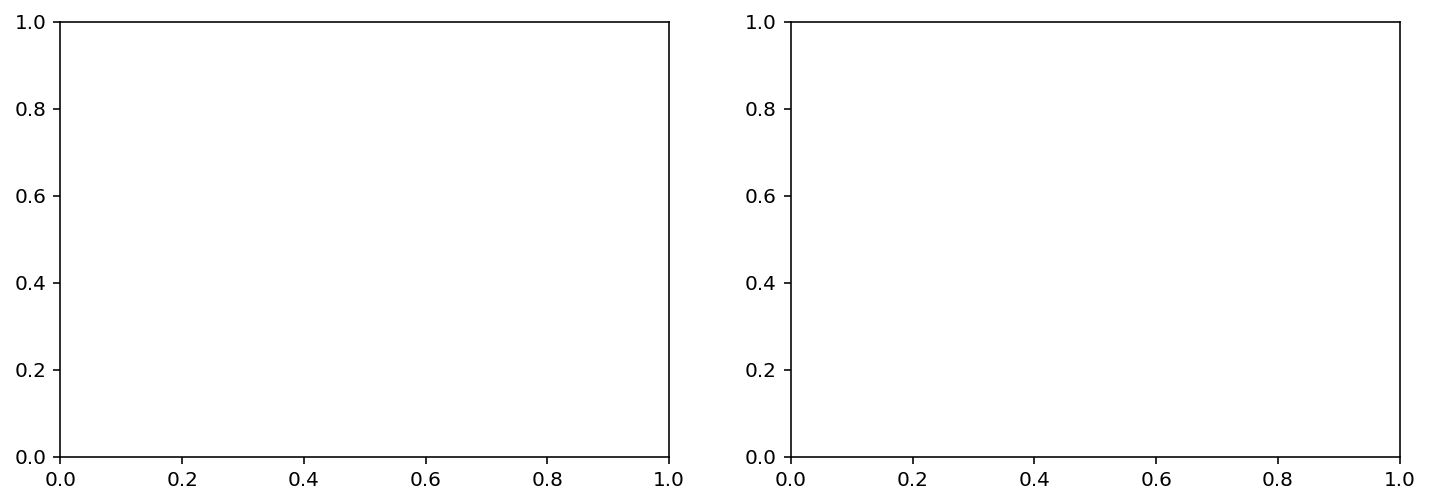

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(12,4))
ax1.plot(n_list, running_times)
ax1.set_xlabel("n")
ax1.set_ylabel("Running time (s)")

ax2.plot(n_list, fillin)
ax2.set_xlabel("n")
ax2.set_ylabel("Fill in ratio");

### Exercise 2c

In [51]:
# scipy splu() returns L, U, perm_c, perm_r s.t. perm_r*A*perm_c = L*U # (see scipy.sparse.linalg.SuperLU)
# perm_r and perm_c are used by default
# deactivate use of perm_c with permc_spec="Natural" and
# deactivate the use of perm_r with the use of diag_pivot_thresh=0, # options={"SymmetricMode": True}
def lu2ldu(A):
    A = sparse.csc_matrix(A)
    lu = splu(A, permc_spec="Natural", diag_pivot_thresh=0,options={"SymmetricMode": True}) # investigate numerical round-off
    
    #Investigate numerical round-off
    L = sparse.csc_matrix.copy(lu.L)
    U = sparse.csc_matrix.copy(lu.U)
    D = sparse.diags(sparse.csc_matrix.diagonal(U), 0,shape=(np.size(A, 0), np.size(A, 1))) 
    U = sparse.triu(U, +1)
    L = sparse.tril(L * D, -1) 
    LDUh = L + D + U
    return LDUh

In [38]:
A, b = fdm2d(4,-1.0,-1.0,3.0,-4.0,1.0)
LDUh = lu2ldu(A)

In [41]:
L = sparse.tril(LDUh,-1);
U = sparse.triu(LDUh,+1);
D = sparse.spdiags(sparse.csc_matrix.diagonal(LDUh),[0],np.size(LDUh,0),np.size(LDUh,1)); # solve Au = b <==> u = (D+U)\inv * D * (L+D)\inv b
u = spsolve(D+U,D*spsolve(L+D,b));
print(np.linalg.norm(A*u-b,2))

0.20238577025077634


In [52]:
def fdm1d(n: int, a_x = -1.0, b_x = 0.0, c = 0.0) -> (sparse.csc_matrix, np.array):
    h = 1.0/(n+1)
    Dx = sparse.diags([a_x - h*b_x/2, -2*a_x+h*h*c/2.0, a_x + h*b_x/2], offsets=[-1, 0, 1], shape=(n,n)) 
    A = Dx;
    X = np.mgrid[1:n+1]/(n+1)
    b = h*h*X # row vector (only 1 dimension)!
    return A, b

In [108]:
A, b = fdm1d(32)

LDUh = lu2ldu(A).toarray().astype(float)
LDU = ldu(A.toarray()).astype(float)

print("Identical:", np.all(LDU == LDUh))

#investigate where it fails..
print(LDU[LDUh != LDU])
print(LDUh[LDUh != LDU])
print(LDUh[LDUh != LDU] == LDU[LDUh != LDU])

Identical: False
[-1. -1.]
[-1. -1.]
[False False]


### Exercise 3a

In [161]:
nv = 4
na = 10

IJ = np.random.randint(0, nv, (2, na))
V = np.ones(na)
M = np.arange(na)

inc_in = sparse.csc_matrix((V, (IJ[0], M)), shape=(nv, na), dtype=np.int8)
inc_out = sparse.csc_matrix((-V, (IJ[1], M)), shape=(nv, na), dtype=np.int8)
incidence_matrix = inc_in + inc_out

incidence_matrix.A

array([[ 0,  0,  0,  0,  1, -1,  0,  0,  0,  0],
       [ 0,  0, -1,  1,  0,  0, -1,  0,  0,  1],
       [ 0,  1,  1, -1,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0, -1,  1,  1,  0,  0, -1]], dtype=int8)

In [162]:
#It is permitted that arcs (v,w) occur multiple times ???
#We print all arcs (v, w). With this approach, it is possible that
#arcs occur multiple times:
[tuple(k) for k in IJ.T]

[(3, 3),
 (2, 3),
 (2, 1),
 (1, 2),
 (0, 3),
 (3, 0),
 (3, 1),
 (2, 2),
 (0, 0),
 (1, 3)]

### Exercise 3b

In [165]:
# Instead, we generate all possible arcs 
# and sample without replacement

import itertools
import random

all_possible_arcs = list(itertools.permutations(np.arange(nv), 2))
IJ = np.array(random.sample(all_possible_arcs, na)).T

inc_in = sparse.csc_matrix((V, (IJ[0], M)), shape=(nv, na), dtype=np.int8)
inc_out = sparse.csc_matrix((-V, (IJ[1], M)), shape=(nv, na), dtype=np.int8)
incidence_matrix = inc_in + inc_out

incidence_matrix.A

array([[-1,  0,  1,  0,  1,  0,  0,  1, -1, -1],
       [ 1,  1,  0, -1, -1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  1, -1,  1,  0],
       [ 0, -1, -1,  1,  0,  0, -1,  0,  0,  1]], dtype=int8)

In [170]:
# Check for double arcs:
[tuple(k) for k in IJ.T]

[(1, 0),
 (1, 3),
 (0, 3),
 (3, 1),
 (0, 1),
 (1, 2),
 (2, 3),
 (0, 2),
 (2, 0),
 (3, 0)]

### Exercise 4a

Eigenvalues $\lambda$ of matrix $A$ can be obtained by solving the equation $$A \cdot \vec{x} = \lambda \cdot \vec{x},$$ equal to $$(A-\lambda I)\cdot \vec{x}=0$$ with $I$ the identity matrix. This equation can be solved by setting the determinant of $A-\lambda I$ to zero and solving for $\lambda$.
$$\det(A_1-\lambda I)=\det\left( \begin{matrix} 2-\lambda & -1 & 0 \\ -1 & 2-\lambda & -1 \\ 0 & -1 & 2-\lambda \end{matrix} \right)=0$$
$$(2-\lambda) \det \left( \begin{matrix} 2-\lambda & -1 \\ -1 & 2-\lambda \end{matrix} \right) + \det \left( \begin{matrix} -1 & -1 \\ 0 & 2-\lambda \end{matrix} \right)=0$$
$$(2-\lambda)((2-\lambda)^2-1)-(2-\lambda)=0$$
$$(2-\lambda)((2-\lambda)^2-2)=0$$
$$\lambda=2 \vee (2-\lambda)^2=2$$
$$\lambda_1=2, \lambda_2=2-\sqrt{2}, \lambda_3=2+\sqrt{2}$$

Eigenvectors $\vec{x}_i$ now can be obtained by solving $(A-\lambda_i I)\cdot \vec{x}_i=0$ for every $\lambda_i$. Let $\vec{x}_2=[v_1; v_2; v_3]$, then $(A-\lambda_2 I)\cdot \vec{x}_2$ is 

$$\left( \begin{matrix} 2-(2-\sqrt{2}) & -1 & 0 \\ -1 & 2-(2-\sqrt{2}) & -1 \\ 0 & -1 & 2-(2-\sqrt{2})\end{matrix} \right) \left( \begin{matrix} v_1 \\ v_2 \\ v_3 \end{matrix} \right)=0$$
$$\left( \begin{matrix} \sqrt{2} & -1 & 0 \\ -1 & \sqrt{2} & -1 \\ 0 & -1 & \sqrt{2}\end{matrix} \right) \left( \begin{matrix} v_1 \\ v_2 \\ v_3 \end{matrix} \right)=0$$
$$\left( \begin{matrix} \sqrt{2} v_1 - v_2\\ -v_1 + \sqrt{2} v_2 - v_3 \\ -v_2 + \sqrt{2} v_3 \end{matrix} \right)=0$$
Solving this system of equation with $v_2=\sqrt{2} v_1$, such that $-v_1+\sqrt{2}\sqrt{2}v_1-v_3=0$. Resulting in $v_1=v_3$. Setting $v_1$ equal to $a$, we get the vector $a \cdot \left( \begin{matrix} 1 \\ \sqrt{2} \\ 1\end{matrix} \right)$. Normalizing gives us $\vec{x}_2=\left( \begin{matrix} 1/2 \\ \sqrt{2}/2 \\ 1/2\end{matrix} \right)$.
The other two eigenvectors can be computed in the same way resulting in $\vec{x}_1=\left( \begin{matrix} \sqrt{2}/2 \\ 0 \\ -\sqrt{2}/2 \end{matrix} \right)$ and $\vec{x}_3=\left( \begin{matrix} -1/2 \\ \sqrt{2}/2 \\ -1/2\end{matrix} \right)$


The calculation for $A_2$ is exactly the same when substituting $2-\lambda$ for $4-\lambda$ resulting in $\lambda_1=4, \lambda_2=4-\sqrt{2}, \lambda_3=4+\sqrt{2}$ and eigenvectors

$\vec{x}_1=\left( \begin{matrix} \sqrt{2}/2 \\ 0 \\ -\sqrt{2}/2 \end{matrix} \right)$, $\vec{x}_2=\left( \begin{matrix} 1/2 \\ \sqrt{2}/2 \\ 1/2\end{matrix} \right)$ and $\vec{x}_3=\left( \begin{matrix} 1/2 \\ -\sqrt{2}/2 \\ 1/2\end{matrix} \right)$

In [174]:
#check for correctness
# A_1 = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])
# A_2 = np.array([[4, -1, 0], [-1, 4, -1], [0, -1, 4]])
# np.linalg.eig(A_1)
# np.linalg.eig(A_2)

### Exercise 4b

In [110]:
### b
ops_per_sec = 10**8
n_max = np.power(ops_per_sec * 3600, 1/3)
print(f"Largest n for which all eigenpairs can be computed in less than one hour: \n \
    {np.ceil(n_max).astype(int)}")

Largest n for which all eigenpairs can be computed in less than one hour: 
     7114


### Exercise 4c

In [111]:
### c
n_ops = np.power(8*10**9, 3/2)
print(f"Computation of all eigenpairs for the largest full matrix takes: \n \
        {n_ops / ops_per_sec / 3600 / 24 :.4f} days")

Computation of all eigenpairs for the largest full matrix takes: 
         82.8173 days


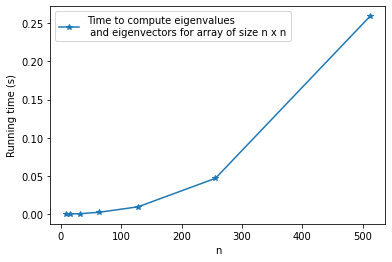

In [112]:
### d
n_list = [8,16,32,64,128,256,512]
running_times = []

for n in n_list:
    A, b = fdm1d(n)
    
    start_time = time.time()
    eigenvalues, eigenvectors = np.linalg.eig(A.toarray())
    run_time = time.time() - start_time
    
    running_times.append(run_time)
    
plt.plot(n_list, running_times, '*-', label='Time to compute eigenvalues \n and eigenvectors for array of size n x n')
plt.xlabel("n")
plt.ylabel("Running time (s)");
plt.legend();

### Exercise 5a

In [199]:
n = 5
IJV = np.random.randint(0, n, (3, 20))

A = sparse.csr_matrix((IJV[2], (IJV[0], IJV[1])), shape=(n, n))

def spones(x):
    y = x.copy().tocsr()
    y.data.fill(1)
    return y

spones(A).A

array([[1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 1, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1]], dtype=int64)

In [209]:
A

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [208]:
A = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
A.dot(A)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

### Ex 6

In [210]:
from scipy.io import loadmat
import pandas as pd

In [212]:
path_joris = "../gallery/databases/DB1.mat"
path_lars = "../gallery/databases/DB1.mat"

'../../2mmn20_1/gallery/databases/DB1.mat'

In [391]:
path_joris = "../gallery/databases/DB1.mat"
path_lars = "../gallery/databases/DB1.mat"

table = loadmat(path_joris)
variable_names=["nb_transaction",
                  "segment",
                  "product_segment",
                  "territory",
                  "sub_territory", 
                  "key_account",
                  "incoterms",
                  "customer_group_code", 
                  "customer",
                  "product_code",
                  "timestamp",
                  "volume",
                  "turnover",
                  "margin",
                  "cost_price", 
                  "price"]

df = pd.DataFrame(table['T'], columns=variable_names)\
    .loc[:, ['customer', "timestamp", "volume","price"]]\
    .astype({'customer':'int'})

df.head()

,customer,timestamp,volume,price
0,1453,1.0,0.000000,0.000
1,1508,1.0,6283.185307,1.298
2,1526,1.0,2513.274123,14.300
3,1570,1.0,78.539816,11.836
4,1582,1.0,3989.822670,1.496


### Exercise 6a

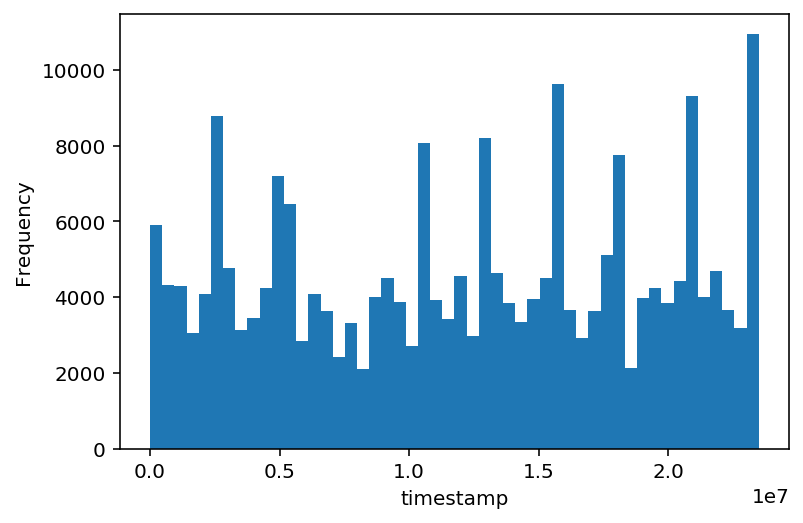

In [392]:
ax = df['timestamp'].plot.hist(bins=50)
ax.set_xlabel('timestamp');

### Exercise 6b

In [393]:
unique_ts = np.unique(df.timestamp)
print(f"Distinct time periods: {np.unique(np.diff(unique_ts))}")

Distinct time periods: [ 86400. 172800.]


### Exercise 6c

In [394]:
df['dt'] = pd.to_datetime(df.timestamp, unit='s')
df.dt.max() - df.dt.min()

Timedelta('272 days 00:00:00')

### Exercise 6d

In [395]:
nb_customers = df.customer.unique().shape[0]
print(f"Number of distinct customers: {nb_customers}")

Number of distinct customers: 3635


### Exercise 6e

In [396]:
counts_per_id = np.bincount(df.customer.unique(), 
                            minlength=df.customer.max()+1)[1:]
np.sum(counts == 0)

# so each ID from 1 to 3635 is used. 
# Hence, they are numbered 1:nb_customers 

0

### Exercise 6f

In [400]:
def relabel(column_name):
    """
    We create a "hash function" that maps the old ID to the new ID 
    and apply this hash function to each row
    """
    old_id = np.unique(df[column_name])
    new_id = np.arange(1, len(old_id)+1)

    hash_func = pd.Series(data = new_id, index=old_id).get
    df['relab_'+column_name] = df[column_name].apply(hash_func)
    return df
    
df = relabel('customer')

# sanity check
counts_per_id = np.bincount(df.relab_customer.unique(), 
                            minlength=df.relab_customer.max()+1)[1:]
np.sum(counts == 0)


0

### Exercise 6g

In [401]:
transactions = df.groupby("customer").volume.count()
transactions

customer
1       24
2       14
3        1
4        3
5       11
        ..
3631     1
3632     7
3633     7
3634     1
3635     1
Name: volume, Length: 3635, dtype: int64

### Exercise 6h

In [402]:
volumes = df.groupby("customer").volume.sum()
volumes

customer
1       34054.864365
2       38688.713529
3           0.000000
4         157.079633
5       34353.315667
            ...     
3631     9896.016859
3632      719.424718
3633     3204.424507
3634     6534.512719
3635    38327.430374
Name: volume, Length: 3635, dtype: float64

### Exercise 6i

In [403]:
avg_prices = df.groupby("customer").price.mean()
avg_prices

customer
1       15.276006
2       17.663778
3        0.000000
4        0.000067
5        3.780911
          ...    
3631     5.497679
3632     8.043233
3633     3.814173
3634     2.435519
3635     0.799662
Name: price, Length: 3635, dtype: float64

### Exercise 6j

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


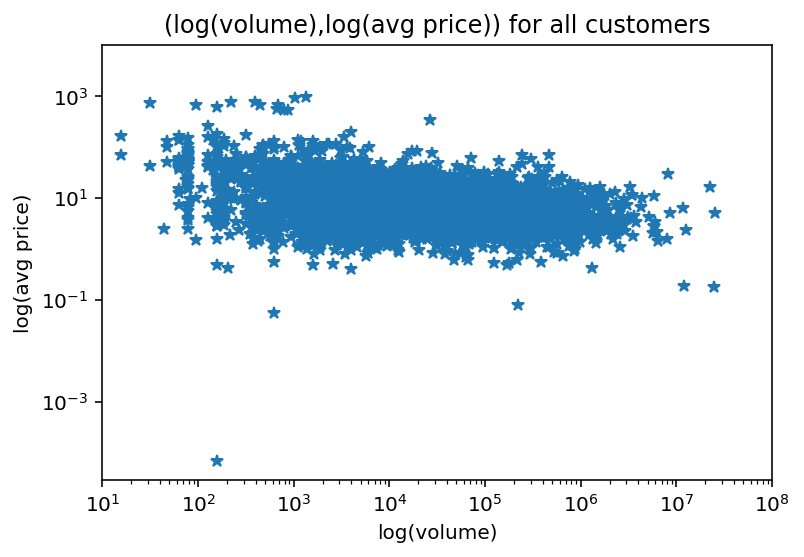

In [404]:
plt.loglog(volumes, avg_prices, '*')
plt.ylim([-10**8, 10**4])
plt.xlim([10, 10**8])
plt.title("(log(volume),log(avg price)) for all customers")
plt.xlabel("log(volume)")
plt.ylabel("log(avg price)");

In [413]:
column_name='timestamp'

df = relabel('timestamp').sort_values('relab_timestamp')
df["volume_scaled"] = df["volume"] / abs(df["volume"].max())
df.head()

,customer,timestamp,volume,price,dt,relabeled_customer,relab_customer,relab_timestamp,volume_scaled
0,1453,1.0,0.000000,0.000000,1970-01-01 00:00:01,1453,1453,1,0.000000
230545,2172,1.0,6283.185307,1.011170,1970-01-01 00:00:01,2172,2172,1,0.005797
230544,2171,1.0,116238.928183,0.890007,1970-01-01 00:00:01,2171,2171,1,0.107246
230543,2171,1.0,6283.185307,1.362845,1970-01-01 00:00:01,2171,2171,1,0.005797
230552,2173,1.0,1178.097245,28.108053,1970-01-01 00:00:01,2173,2173,1,0.001087


### Exercise 6k

In [416]:
### k
timeseries = sparse.csc_matrix((df["volume_scaled"], 
                                (df["relab_timestamp"]-1, 
                                 df["relabeled_customer"]-1)))
timeseries.A

array([[0.03142029, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00295652, 0.00602899,
        0.03536232]])

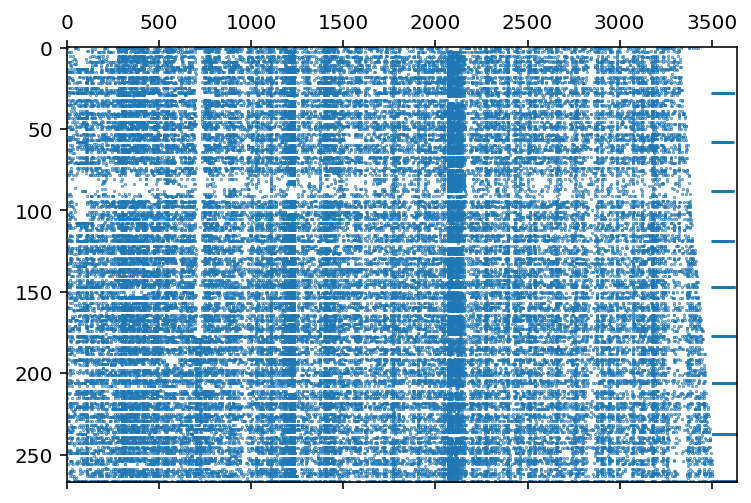

In [415]:
### l
plt.spy(timeseries, aspect='auto', markersize=0.2)

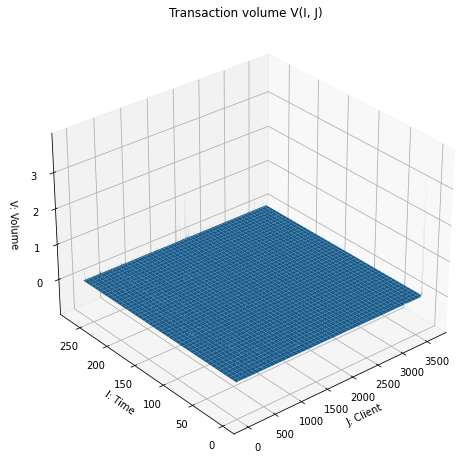

In [327]:
### m
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(range(1, df['customer ID'].max() + 1), range(1, df['timestamp'].max() + 1))
surf = ax.plot_surface(X, Y, timeseries.A, lw=3)
ax.azim = 230
ax.set_xlabel("J: Client")
ax.set_ylabel("I: Time")
ax.set_zlabel("V: Volume");
plt.title("Transaction volume V(I, J)");

In [328]:
### n
df.groupby("customer").volume.max()

customer
1       0.015072
2       0.007246
3       0.000000
4       0.000145
5       0.005797
          ...   
3631    0.009130
3632    0.000290
3633    0.000580
3634    0.006029
3635    0.035362
Name: volume, Length: 3635, dtype: float64

In [340]:
### o
sum_per_customer_on_t = df.groupby(["timestamp", "customer"]).volume.sum()

print("The amount of times that for a specific customer on a specific timestamp \n \
     all transactions sum to zero is: {}".format(len((sum_per_customer_on_t == 0).nonzero()[0])))

The amount of times that for a specific customer on a specific timestamp 
      all transactions sum to zero is: 4945


/Users/larsschilders/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """


,customer,timestamp,volume,price,customer ID
0,1,1,0.015072,3.705125,3624
1,1,1,0.003942,3.803721,3624
2,1,1,0.001739,3.503433,3624
3,1,1,0.001739,3.562967,3624
4,1,1,0.001130,3.303231,3624
...,...,...,...,...,...
26282,3633,267,0.000522,4.008444,3572
26283,3633,267,0.000116,3.856250,3572
26284,3633,267,0.000058,9.508500,3572
26285,3634,267,0.006029,2.435519,3573


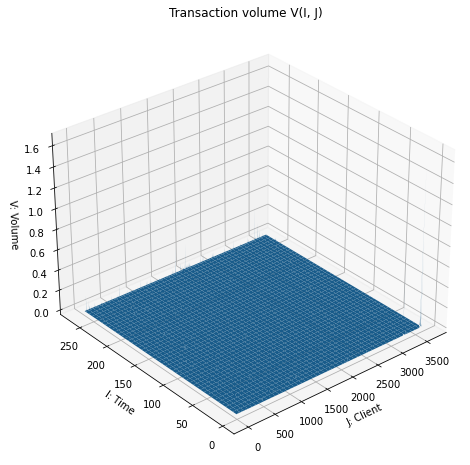

In [359]:
### p

df_agg = df.groupby("customer").apply(lambda x: x.sort_values("volume", ascending=False).head(k))
df_agg = df_agg.reset_index(drop=True)

timeseries = sparse.csc_matrix((df_agg["volume"], (df_agg["timestamp"]-1, df_agg["customer ID"]-1)))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(range(1, df['customer ID'].max() + 1), range(1, df['timestamp'].max() + 1))
surf = ax.plot_surface(X, Y, timeseries.A, lw=3)
ax.azim = 230
ax.set_xlabel("J: Client")
ax.set_ylabel("I: Time")
ax.set_zlabel("V: Volume");
plt.title("Transaction volume V(I, J)");

In [373]:
### q
df["total volume"] = df.groupby("customer")["volume"].transform("sum")
df.sort_values(["total volume"], ascending=[True])#.drop("total volume",axis=1)

,customer,timestamp,volume,price,customer ID,total volume
73491,1562,92,-0.009971,2.464000,2790,-0.010594
73492,1562,92,-0.000623,2.464000,2790,-0.010594
50265,1702,35,-0.000186,0.000155,2544,-0.000562
154088,1702,187,0.000348,23.958000,2544,-0.000562
50266,1702,35,-0.000362,0.000240,2544,-0.000562
...,...,...,...,...,...,...
201213,1050,238,0.045217,0.862692,1975,23.150493
201212,1050,238,0.010435,0.904200,1975,23.150493
201211,1050,238,0.004638,0.939331,1975,23.150493
48873,1050,59,0.000000,0.000000,1975,23.150493
